In [15]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score, recall_score, precision_score
from sklearn import metrics

In [16]:
df_check = pd.read_csv(r'H:\IFT6759\20220420\iwildcam_split_test_seed_2_epoch_best_pred_with_aug.csv')

In [17]:
y_true = df_check.y_true
y_pred = df_check.y_pred

In [18]:
print(classification_report(y_true,y_pred))


              precision    recall  f1-score   support

           0       0.95      0.94      0.94      5589
           1       0.00      0.00      0.00         1
           2       0.71      0.63      0.67       433
           3       0.00      0.00      0.00        37
           4       0.45      0.66      0.54       329
           5       0.00      0.00      0.00         5
           6       0.29      0.58      0.38        24
           7       0.00      0.00      0.00         6
           8       0.57      0.74      0.65       464
           9       0.00      0.00      0.00        15
          11       0.00      0.00      0.00         1
          12       0.18      0.29      0.22         7
          13       0.00      0.00      0.00         1
          15       0.78      0.61      0.69       493
          16       0.00      0.00      0.00         1
          17       0.64      0.17      0.27        52
          18       0.00      0.00      0.00         0
          20       0.60    

In [19]:
report = classification_report(y_true,y_pred)

In [20]:
df = pd.DataFrame(classification_report(y_true,y_pred, output_dict=True)).transpose()

In [21]:
df.to_csv(r'H:\IFT6759\20220420\classification_report_with_augmentation.csv')

In [22]:
df_bar_chart = pd.read_csv(r'H:\IFT6759\20220420\bar_chart_DenseNet_ERM_OOD.csv')

In [23]:
df_bar_chart

,Augmentation,Mean,Max,Min
0,None,26.58,29.00,24.16
1,Weak,28.80,30.93,26.67
2,Strong,29.98,31.65,28.31
3,Cutmix,23.42,24.03,22.81


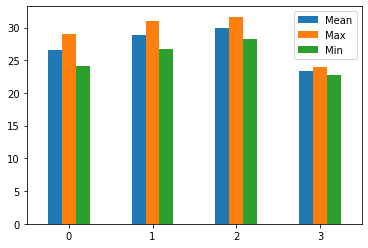

In [27]:
ax = df_bar_chart.plot.bar(rot=0)

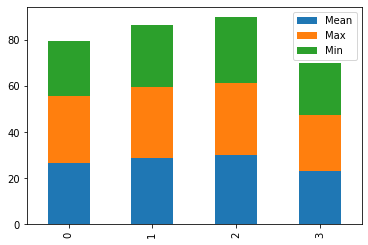

In [26]:
ax = df_bar_chart.plot.bar(stacked=True)


Text(0, 0.5, 'Macro F1 Score OOD')

<Figure size 640x480 with 0 Axes>

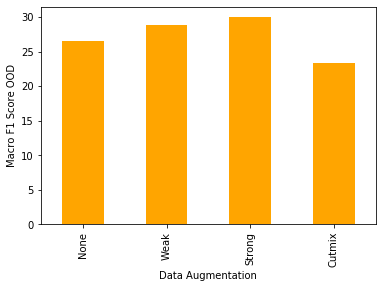

In [41]:
# importing pandas library
import pandas as pd
# import matplotlib library
import matplotlib.pyplot as plt

from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)

# plotting Height
ax = df_bar_chart.plot(x="Augmentation", y="Mean", kind="bar", color = 'orange')
ax.get_legend().remove()
plt.xlabel("Data Augmentation")
plt.ylabel("Macro F1 Score OOD")
# plotting age on the same axis
#df_bar_chart.plot(x="Augmentation", y="Min", kind="bar", ax=ax, color="maroon")
# plotting age on the same axis
#df_bar_chart.plot(x="Augmentation", y="Max", kind="bar", ax=ax, color="green")

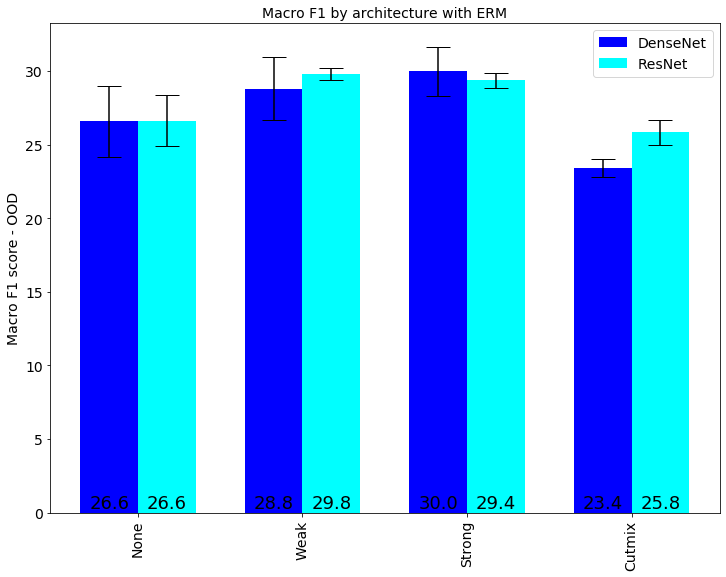

In [153]:
"""
========
Barchart
========

A bar plot with errorbars and height labels on individual bars
"""
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12, 9)

N = 4
dnet_means = (26.58, 28.80, 29.98, 23.42)
dnet_std = (2.42, 2.13, 1.67, 0.61)

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, dnet_means, width, color='blue', yerr=dnet_std, capsize=12)

rnet_means = (26.63, 29.80, 29.37, 25.83)
rnet_std = (1.72, 0.40, 0.50, 0.83)
rects2 = ax.bar(ind + width, rnet_means, width, color='cyan', yerr=rnet_std, capsize=12)

# add some text for labels, title and axes ticks
ax.set_ylabel('Macro F1 score - OOD',fontsize=14)
ax.set_title('Macro F1 by architecture with ERM',fontsize=14)
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('None', 'Weak', 'Strong', 'Cutmix'))
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)

ax.legend((rects1[0], rects2[0]), ('DenseNet', 'ResNet'),loc='upper right',fontsize=14)


def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 0.0*height,
                '%.1f' % float(height),
                color='black', fontsize=18,
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()
fig.savefig('H:/IFT6759/bestmodel_withindicies/MacroF1byarchitecturewithERM.png')   # save the figure to file
plt.close(fig)

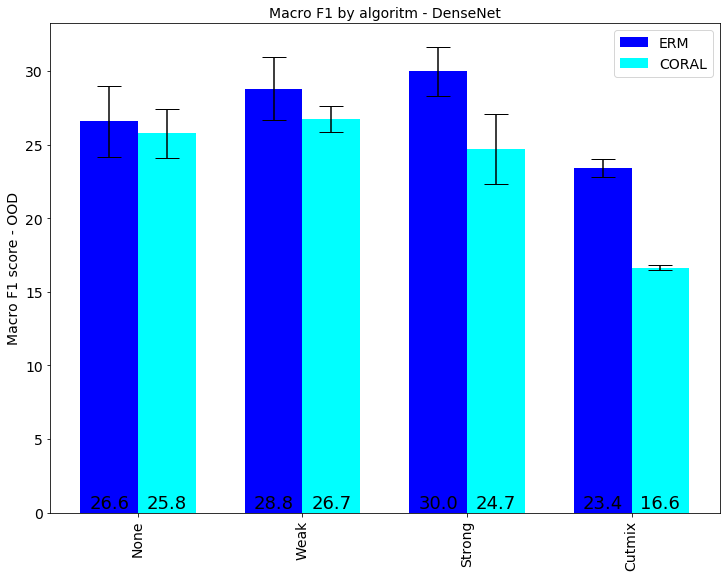

In [154]:
"""
========
Barchart
========

A bar plot with errorbars and height labels on individual bars
"""
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12, 9)

N = 4
erm_means = (26.58, 28.80, 29.98, 23.42)
erm_std = (2.42, 2.13, 1.67, 0.61)

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, erm_means, width, color='blue', yerr=erm_std, capsize=12)

coral_means = (25.78, 26.73, 24.72, 16.63)
coral_std = (1.67, 0.89, 2.37, 0.16)
rects2 = ax.bar(ind + width, coral_means, width, color='cyan', yerr=coral_std, capsize=12)

# add some text for labels, title and axes ticks
ax.set_ylabel('Macro F1 score - OOD',fontsize=14)
ax.set_title('Macro F1 by algoritm - DenseNet',fontsize=14)
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('None', 'Weak', 'Strong', 'Cutmix'))
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)

ax.legend((rects1[0], rects2[0]), ('ERM', 'CORAL'),loc='upper right',fontsize=14)


def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 0.0*height,
                '%.1f' % float(height),
                color='black', fontsize=18,
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()
fig.savefig('H:/IFT6759/bestmodel_withindicies/MacroF1byalgoritm-DenseNet.png')   # save the figure to file
plt.close(fig)

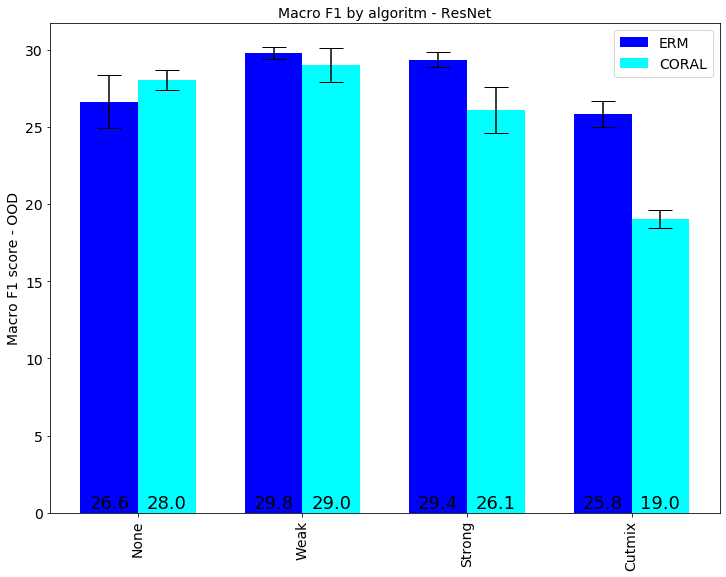

In [155]:
"""
========
Barchart
========

A bar plot with errorbars and height labels on individual bars
"""
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12, 9)

N = 4
erm_means = (26.63, 29.80, 29.37, 25.83)
erm_std = (1.72, 0.40, 0.50, 0.83)

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, erm_means, width, color='blue', yerr=erm_std, capsize=12)

coral_means = (28.04, 29.01, 26.10, 19.03)
coral_std = (0.63, 1.08, 1.50, 0.59)
rects2 = ax.bar(ind + width, coral_means, width, color='cyan', yerr=coral_std, capsize=12)

# add some text for labels, title and axes ticks
ax.set_ylabel('Macro F1 score - OOD',fontsize=14)
ax.set_title('Macro F1 by algoritm - ResNet',fontsize=14)
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('None', 'Weak', 'Strong', 'Cutmix'))
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)

ax.legend((rects1[0], rects2[0]), ('ERM', 'CORAL'),loc='upper right',fontsize=14)


def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 0.0*height,
                '%.1f' % float(height),
                color='black', fontsize=18,
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()
fig.savefig('H:/IFT6759/bestmodel_withindicies/MacroF1byalgoritm-ResNet.png')
plt.close(fig)

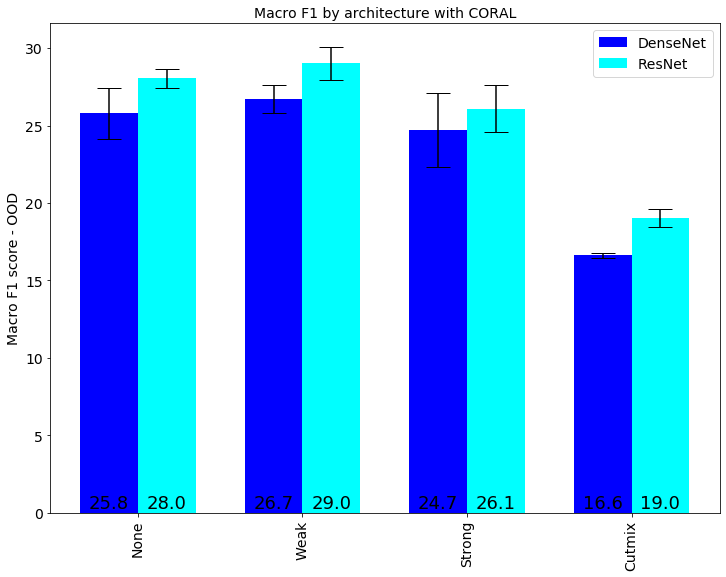

In [156]:
"""
========
Barchart
========

A bar plot with errorbars and height labels on individual bars
"""
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12, 9)

N = 4

dnet_means = (25.78, 26.73, 24.72, 16.63)
dnet_std = (1.67, 0.89, 2.37, 0.16)

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, dnet_means, width, color='blue', yerr=dnet_std, capsize=12)

rnet_means = (28.04, 29.01, 26.10, 19.03)
rnet_std = (0.63, 1.08, 1.50, 0.59)
rects2 = ax.bar(ind + width, rnet_means, width, color='cyan', yerr=rnet_std, capsize=12)

# add some text for labels, title and axes ticks
ax.set_ylabel('Macro F1 score - OOD',fontsize=14)
ax.set_title('Macro F1 by architecture with CORAL',fontsize=14)
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('None', 'Weak', 'Strong', 'Cutmix'))
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)

ax.legend((rects1[0], rects2[0]), ('DenseNet', 'ResNet'),loc='upper right',fontsize=14)


def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 0.0*height,
                '%.1f' % float(height),
                color='black', fontsize=18,
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()
fig.savefig('H:/IFT6759/bestmodel_withindicies/MacroF1byarchitecturewithCORAL.png')   # save the figure to file
plt.close(fig)